<a href="https://colab.research.google.com/github/drapi222/DotRing/blob/main/Project_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
def generate_random_dot_image(width, height, min_dots, max_dots, dot_size):
  num_dots = np.random.randint(min_dots, max_dots + 1)
  black_image = np.zeros((height, width), dtype=np.uint8)

  random_x = np.random.randint(0, width - dot_size + 1, num_dots)
  random_y = np.random.randint(0, height - dot_size + 1, num_dots)

  for x, y in zip(random_x, random_y):
    black_image[y:y + dot_size, x:x + dot_size] = 155

  return black_image

In [ ]:
def generate_random_rings_image(width, height, min_rings, max_rings, thicc):
    black_image = np.zeros((height, width), dtype=np.uint8)

    center_x, center_y = width // 2, height // 2  # Center of the image

    num_rings = np.random.randint(min_rings, max_rings + 1)
    radii = np.random.randint(min(width, height) // 20, min(width, height) // 3, size=num_rings)

    for radius in radii:
        outer_radius = radius
        inner_radius = outer_radius - thicc

        y_indices, x_indices = np.ogrid[:height, :width]
        mask_outer = (x_indices - center_x)**2 + (y_indices - center_y)**2 <= outer_radius**2
        mask_inner = (x_indices - center_x)**2 + (y_indices - center_y)**2 <= inner_radius**2

        black_image[mask_outer] = 100
        black_image[mask_inner] = 0

    return black_image

In [ ]:
dataset_size = 100
width, height = 800, 800
min_dots, max_dots = 20, 40
dot_size = 5
thicc = 5.5

dataset_dots = np.zeros((dataset_size, height, width), dtype=np.uint8)
dataset_rings = np.zeros((dataset_size, height, width), dtype=np.uint8)

In [ ]:
for i in range(dataset_size):
  random_dots_image = generate_random_dot_image(width, height, min_dots, max_dots, dot_size)
  dataset_dots[i] = random_dots_image

  random_ring_image = generate_random_rings_image(width, height, 3, 7, thicc)
  dataset_rings[i] = random_ring_image

In [ ]:
dataset_dots = 255 - dataset_dots
dataset_rings = 255 - dataset_rings
dataset_ring_dot = np.clip(dataset_rings + dataset_dots, 0, 255)

# Normalize the images and flatten them (reshape into a vector)
dataset_ring_dot_norm = dataset_ring_dot.astype('float32') / 255.0
dataset_ring_dot_flat = dataset_ring_dot_norm.reshape((-1, width * height))

In [ ]:
# Autoencoder architecture
input_img = Input(shape=(width * height,))
encoded = Dense(128, activation='relu')(input_img)  # Encoder
decoded = Dense(width * height, activation='sigmoid')(encoded)  # Decoder

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the combined images
autoencoder.fit(dataset_ring_dot_flat, dataset_ring_dot_flat, epochs=10, batch_size=32)

# Use the trained autoencoder to decode the combined images
decoded_images_flat = autoencoder.predict(dataset_ring_dot_flat)
decoded_images = decoded_images_flat.reshape((-1, height, width)) * 255.0

# Reshape the dataset_dots to match the shape of decoded_images_flat
dataset_dots_flat = dataset_dots.reshape((-1, width * height))

# Separate the ring and dot images
dataset_rings_decoded = decoded_images_flat - dataset_dots_flax t
dataset_dots_decoded = dataset_dots_flat.reshape((-1, height, width))


Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 0.2124
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 0.0062
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.0038
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 0.0038
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.0038
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.0038
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.0038
Epoch 8/10
4/4 [==============================] - 7s 2s/step - loss: 0.0038
Epoch 9/10
4/4 [==============================] - 7s 2s/step - loss: 0.0038
Epoch 10/10
4/4 [==============================] - 1s 206ms/step


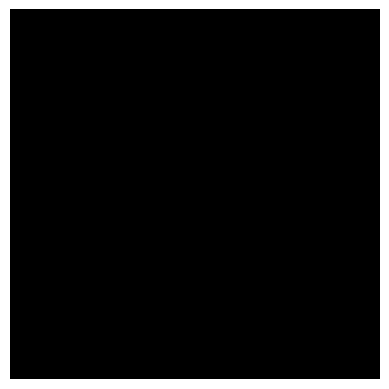

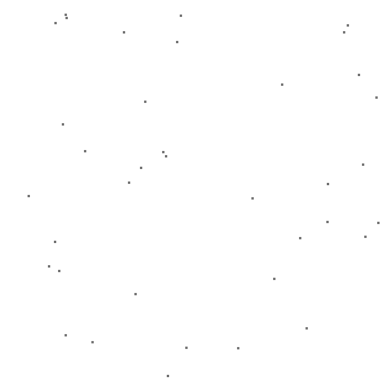

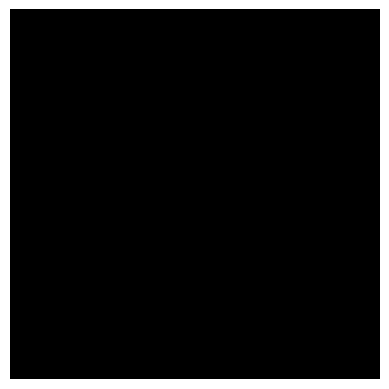

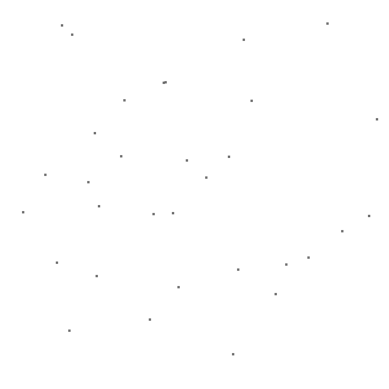

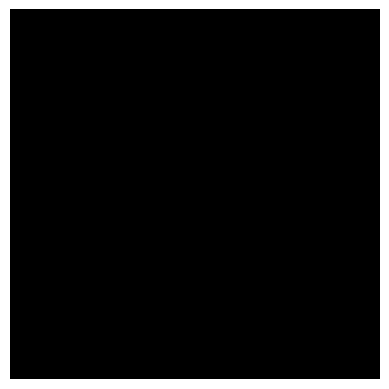

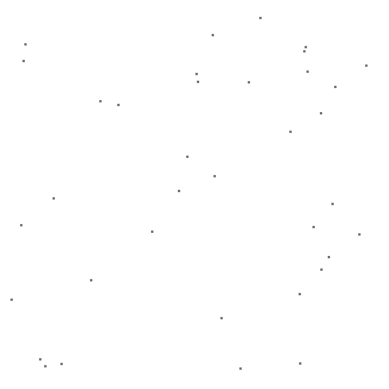

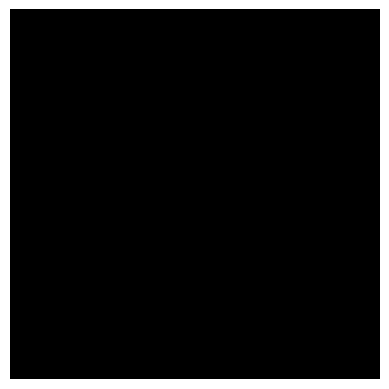

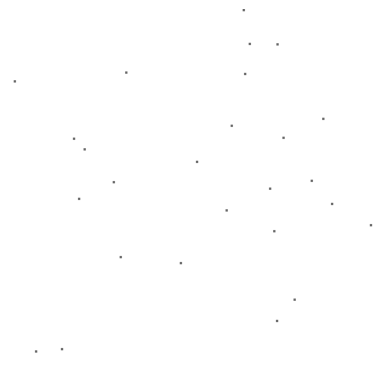

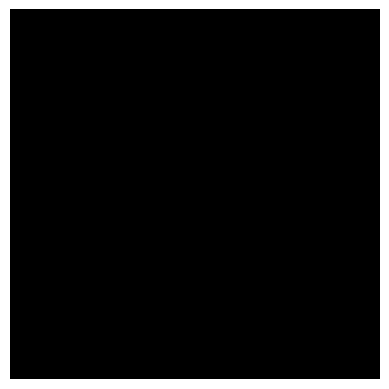

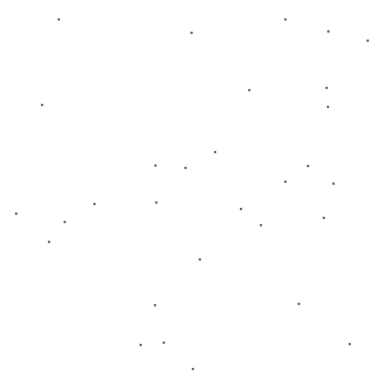

In [ ]:
for i in range(5):  # Display and save the first 5 separated images for rings and dots
    plt.imshow(dataset_rings_decoded[i].reshape((height, width)), cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.savefig(f"separated_rings_image_{i}.png")
    plt.show()

    plt.imshow(dataset_dots_decoded[i], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.savefig(f"separated_dots_image_{i}.png")
    plt.show()